In [1]:
%matplotlib inline

import setGPU
import os, h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize
import glob
from scipy.stats import skew, kurtosis

setGPU: Setting GPU to: 1


In [2]:
from plots import loadModel, getMetric, sortMeans, plotMean, plotMeans, plotStd, plotStds, plotVar, plotSkew, plotKurtosis

In [12]:
all_g_weight1 = '../trial37/weights/generator_weights_step_*.h5'
gen_model1 = '../trial37/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.json'

In [5]:
all_g_weight2 = '../trial28/weights/generator_weights_epoch_*.h5'
gen_model2 = '../trial28/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.json'

In [5]:
#all_g_weight2 = '/nfshome/vitoriabp/hgcal_wgan/trial26/weights/generator_weights_epoch_*.h5'
#gen_model2 = '/nfshome/vitoriabp/hgcal_wgan/trial26/weights/generator_model_change_discriminator.json'

In [13]:
means1, stds1, epochs1, vars1, skews1, kurtoses1 = getMetric(all_g_weight1, gen_model1)

In [7]:
means2, stds2, epochs2, vars2, skews2, kurtoses2 = getMetric(all_g_weight2, gen_model2)

In [14]:
epoch_mean_sorted1 = sortMeans(epochs1, means1)

In [9]:
epoch_mean_sorted2 = sortMeans(epochs2, means2)

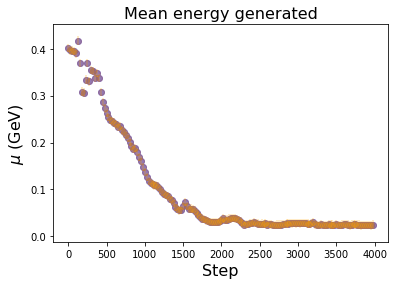

In [15]:
plotMean(epoch_mean_sorted1)

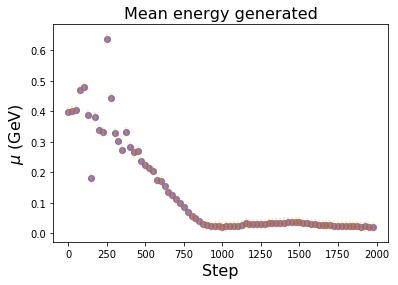

In [11]:
plotMean(epoch_mean_sorted2)

### Mean should be 0.02045

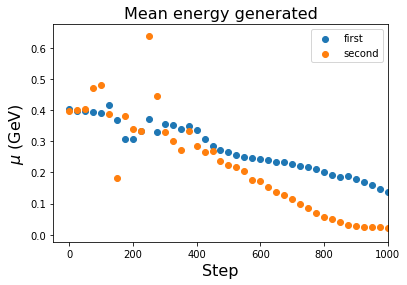

In [16]:
plotMeans(epoch_mean_sorted1, epoch_mean_sorted2)

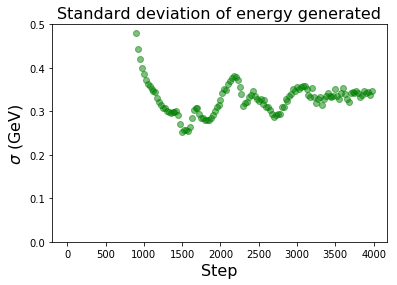

In [17]:
plotStd(epochs1, stds1)

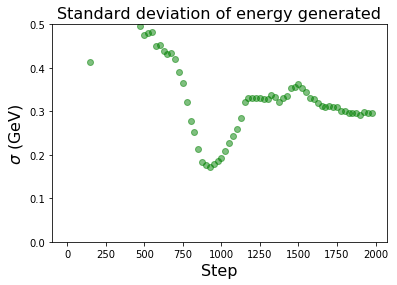

In [18]:
plotStd(epochs2, stds2)

### Std should be 0.33352

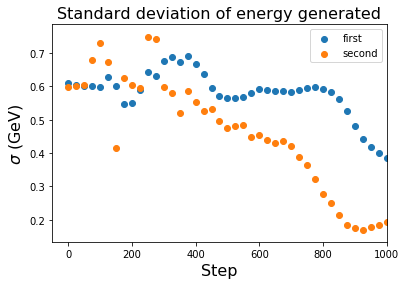

In [19]:
plotStds(epochs1, stds1, epochs2, stds2)

### Aim for variance 0.11124

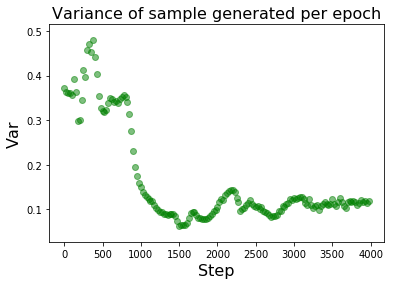

In [20]:
plotVar(epochs1, vars1)

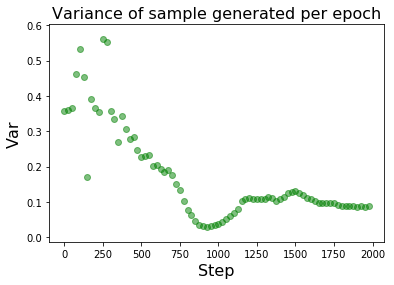

In [21]:
plotVar(epochs2, vars2)

### Skew should be 34.25891

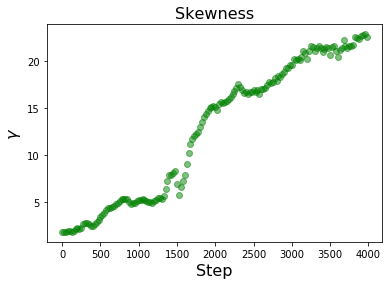

In [22]:
plotSkew(epochs1, skews1)

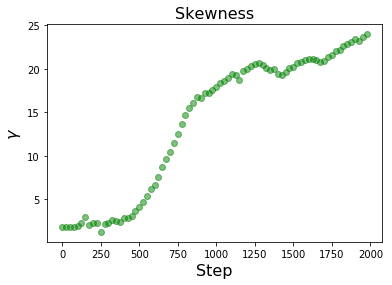

In [23]:
plotSkew(epochs2, skews2)

In [22]:
(34.258909352693216)**(1/float(3))

3.247814210044287

## Third root of skew in input data is 3.25

In [25]:
skew3rt = []
for s in skews2:
    s3rt = (s)**(1/float(3))
    skew3rt.append(s3rt)

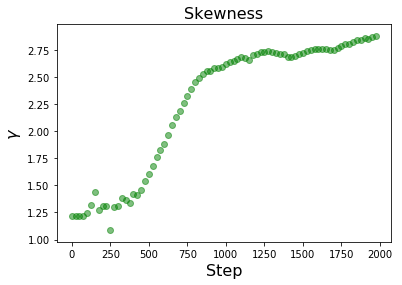

In [26]:
plotSkew(epochs2, skew3rt)

### Kurtosis should be 1552.59190

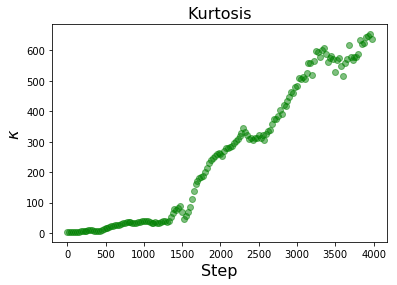

In [27]:
plotKurtosis(epochs1, kurtoses1)

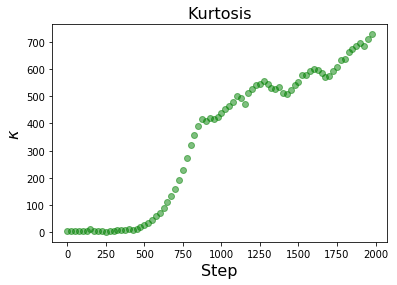

In [28]:
plotKurtosis(epochs2, kurtoses2)

In [29]:
kurt4rt = []
for k in kurtoses2:
    k4rt = (k)**(1/float(4))
    kurt4rt.append(k4rt)

In [30]:
(1552.5919006780448)**(1/4)

6.277176339096015

## Fourth root of kurtosis of input data is 6.28

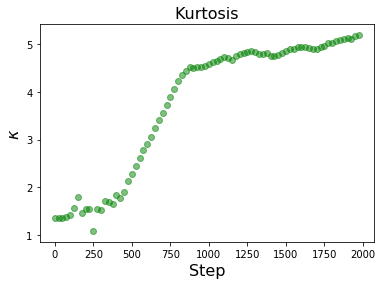

In [31]:
plotKurtosis(epochs2, kurt4rt)

# ------------ STOP EXECUTING HERE ------------------

In [21]:
f = h5py.File('/bigdata/shared/HGCAL_data/single_particle/all_noPU.h5', 'r')
X = np.asarray(f['image'])

In [22]:
X.shape

(155145, 16, 16, 55)

In [23]:
np.mean(X)

0.020452442363707565

In [24]:
np.var(X)

0.11123651795048793

In [25]:
np.std(X)

0.3335213905441268

In [26]:
skew(X, axis=None)

34.258909352693216

In [27]:
kurtosis(X, axis=None)

1552.5919006780448